In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [ ]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)


In [ ]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.047503,1.201044,-0.004923,0.736601,0.329576,1
1,0.909079,0.068829,0.731633,-0.949408,0.923325,0
2,1.741709,0.430866,-0.251342,-3.595765,0.545211,0
3,1.481728,-0.322425,0.210105,-1.629255,0.573109,0
4,-1.075938,0.288144,-1.388681,0.444782,1.759903,1


In [ ]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [ ]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [ ]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [ ]:
df1 = combined_sampling(df,0.5,0.5)

<ipython-input-5-12db9cc58a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [ ]:
df2 = combined_sampling(df,0.5,0.5)

<ipython-input-5-12db9cc58a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [ ]:
df3 = combined_sampling(df,0.5,0.5)

<ipython-input-5-12db9cc58a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [ ]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col3', 'col2', 'target'], dtype='object')
Index(['col1', 'col2', 'target'], dtype='object')
Index(['col2', 'col3', 'target'], dtype='object')


In [ ]:
df3

,col2,col3,target
49,-1.741690,-2.119438,0
51,0.394756,0.907142,1
93,-0.012696,0.208996,0
22,3.602322,-1.113616,1
21,-1.104467,-1.513146,0
94,-0.014748,0.695134,1
35,-1.802940,0.652711,1
4,0.288144,-1.388681,1
13,-0.808369,0.422270,0
93,-0.012696,0.208996,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [ ]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [ ]:
from sklearn.tree import plot_tree

[Text(0.36363636363636365, 0.9166666666666666, 'x[1] <= -0.505\ngini = 0.42\nsamples = 50\nvalue = [15, 35]'),
 Text(0.18181818181818182, 0.75, 'x[0] <= 0.423\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.09090909090909091, 0.5833333333333334, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.2727272727272727, 0.5833333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5454545454545454, 0.75, 'x[0] <= -0.376\ngini = 0.188\nsamples = 38\nvalue = [4, 34]'),
 Text(0.45454545454545453, 0.5833333333333334, 'gini = 0.0\nsamples = 29\nvalue = [0, 29]'),
 Text(0.6363636363636364, 0.5833333333333334, 'x[0] <= -0.043\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.5454545454545454, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7272727272727273, 0.4166666666666667, 'x[0] <= 0.713\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.6363636363636364, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8181818181818182, 0.25, 'x[0] <=

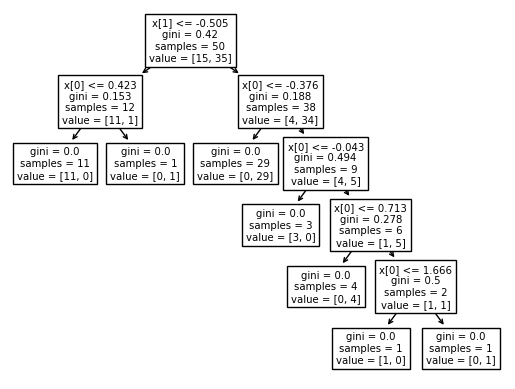

In [ ]:
plot_tree(clf1)

[Text(0.4, 0.9, 'x[0] <= -0.779\ngini = 0.493\nsamples = 50\nvalue = [22, 28]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.5, 0.7, 'x[1] <= 0.537\ngini = 0.391\nsamples = 30\nvalue = [22, 8]'),
 Text(0.3, 0.5, 'x[0] <= 0.074\ngini = 0.165\nsamples = 22\nvalue = [20, 2]'),
 Text(0.2, 0.3, 'x[0] <= -0.007\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.1, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.3, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.7, 0.5, 'x[0] <= -0.679\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.3, 'x[0] <= 1.799\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

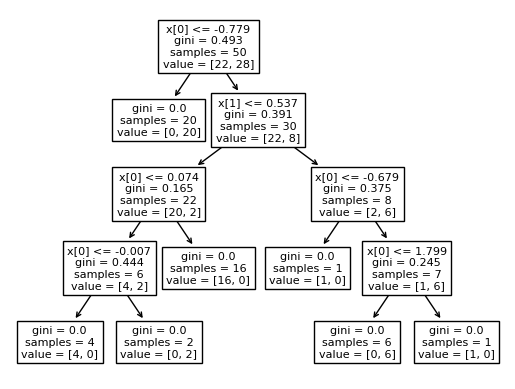

In [ ]:
plot_tree(clf2)

[Text(0.5555555555555556, 0.9, 'x[0] <= 0.244\ngini = 0.48\nsamples = 50\nvalue = [20, 30]'),
 Text(0.3333333333333333, 0.7, 'x[1] <= 0.537\ngini = 0.417\nsamples = 27\nvalue = [19, 8]'),
 Text(0.2222222222222222, 0.5, 'x[0] <= -0.477\ngini = 0.095\nsamples = 20\nvalue = [19, 1]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.3333333333333333, 0.3, 'x[1] <= -0.434\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2222222222222222, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.4444444444444444, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.7777777777777778, 0.7, 'x[0] <= 0.518\ngini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(0.6666666666666666, 0.5, 'x[0] <= 0.413\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.7777777777777778, 0.3, 'gini = 0.0\nsamples = 1\nvalue

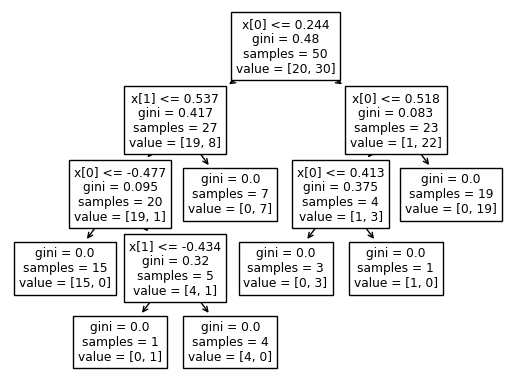

In [ ]:
plot_tree(clf3)

In [ ]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
12,1.646108,3.016855,0.405789,1.270746,0.948489,1
63,1.397091,-0.409082,2.599682,0.774765,2.488735,1
78,1.188754,-1.478558,-1.726798,-0.658967,1.551557,0
34,-2.294837,0.532274,-1.583031,1.635302,0.478626,1
77,1.275746,-2.495612,-2.020087,-0.664421,0.856521,0
51,1.460057,0.394756,0.907142,2.678018,3.030933,1
94,-1.718755,-0.014748,0.695134,-0.721887,0.775567,1
73,-0.062952,-1.561581,-1.864079,0.184279,1.345098,0
88,1.312716,0.199703,0.042417,-2.309730,0.856012,0
82,0.020423,1.721875,-0.723282,1.837744,1.190356,1
